# Reconstruct the Classification data of Biermann et al., 2020

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## Load annotated data from png plot

In [54]:
axis = gpd.read_file("Biermann2020/axis.shp")
axis["col"] = axis.geometry.x
axis["row"] = axis.geometry.y

plastic = gpd.read_file("Biermann2020/plastic.shp")
pumice = gpd.read_file("Biermann2020/pumice.shp")
seafoam = gpd.read_file("Biermann2020/seafoam.shp")
seawater = gpd.read_file("Biermann2020/seawater.shp")
seaweed = gpd.read_file("Biermann2020/seaweed.shp")
timber = gpd.read_file("Biermann2020/timber.shp")

dfs = [plastic, pumice, seafoam, seawater, seaweed, timber]
labels = ["plastic", "pumice", "seafoam", "seawater", "seaweed", "timber"]

for df, label in zip(dfs, labels):
    df["label"] = label

data = pd.concat(dfs)

data["col"] = data.geometry.x
data["row"] = data.geometry.y

## Fit Transformation

In [75]:
import numpy as np

class Transform():
    """https://stackoverflow.com/questions/50562755/how-to-determine-transformation-matrix-having-coordinate-pairs"""

    def fit(self, ndvifdi, colrow):
        A = np.vstack([colrow.T, np.ones(len(colrow))]).T
        x, res, rank, s = np.linalg.lstsq(A, ndvifdi, rcond=None)
        self.x = x
    
    def transform(self, colrow):
        A = np.vstack([colrow.T, np.ones(len(colrow))]).T
        return np.dot(A,self.x)
    
ndvifdi = axis[["ndvi","fdi"]].values
colrow = axis[["col","row"]].values
    
tf = Transform()
tf.fit(ndvifdi, colrow)

print("Transformation Matrix")
print(tf.x)

Transformation Matrix
[[ 1.11533456e-03  7.33219332e-06]
 [ 2.96226851e-07  1.15887458e-04]
 [-6.46992914e-01  9.36081535e-02]]


## Transform

In [76]:
ndvifdi = tf.transform(data[["col","row"]].values)
data["ndvi"] = ndvifdi[:,0]
data["fdi"] = ndvifdi[:,1]

## Save

In [74]:
data.drop(columns=["geometry", "col", "row", "id"]).to_csv("Biermann2020/reconstructed_data.csv")

## Reconstructed Data

Text(0, 0.5, 'fdi')

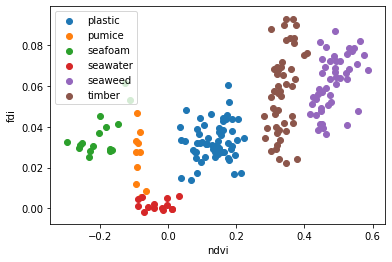

In [66]:
fig, ax = plt.subplots()
for label in labels:
    d = data.loc[data.label == label]
    ax.scatter(x=d["ndvi"], y=d["fdi"])
    
ax.legend(labels)
ax.set_xlabel("ndvi")
ax.set_ylabel("fdi")

## Original Data

Biermann et al., 2020 Fig 2 (right)
file:///home/marc/Downloads/s41598-020-62298-z%20(3).pdf

<img width=500px src="Biermann2020/biermann.png">